In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import math
import numpy as np

from ipynb.fs.full.UtilCollections import SEASONS, PARAMS
from ipynb.fs.full.UtilFunctions import format_season, mean, growth_rate

In [2]:
pylab.rcParams.update(PARAMS)

In [3]:
def get_csvs_by_season(season):
    first_year, second_year = format_season(season)
    
    player_df = pd.read_csv("DataCollection/Player_Stats/player_stats_{0}-{1}.csv".format(first_year, second_year))
    team_df = pd.read_csv("DataCollection/Team_Stats/team_stats_{0}-{1}.csv".format(first_year, second_year))
    adv_team_df = pd.read_csv("DataCollection/Advanced_Team_Stats/adv_team_stats_{0}-{1}.csv".format(first_year, second_year))
    
    return player_df, team_df, adv_team_df

In [4]:
player_dfs, team_dfs, adv_team_dfs = [], [], []

for season in SEASONS:
    player_df, team_df, adv_team_df = get_csvs_by_season(season)
    player_dfs.append(player_df)
    team_dfs.append(team_df)
    adv_team_dfs.append(adv_team_df)

# Calculate average offensive and defensive ratings over the years

 ### Expand by calculating for the whole league, only playoff teams and only non-playoff teams

In [5]:
avg_off_ratings = []
avg_def_ratings = []

for i in range(len(SEASONS)):
    off_ratings = adv_team_dfs[i]["ORtg"]
    def_ratings = adv_team_dfs[i]["DRtg"]
    
    avg_off_ratings.append(round(mean(off_ratings), 2))
    avg_def_ratings.append(round(mean(def_ratings), 2))

In [6]:
diffs_rtg = []
avg_off_rtgs_playoffs = []
avg_def_rtgs_playoffs = []
avg_off_rtgs_non_playoffs = []
avg_def_rtgs_non_playoffs = []
percentage_playoff_teams_above_avg_ortg = []
percentage_playoff_teams_above_avg_drtg = []

for i in range(len(SEASONS)):
    off_rating_playoff_teams = []
    def_rating_playoff_teams = []
    off_rating_non_playoff_teams = []
    def_rating_non_playoff_teams = []
    for index, row in adv_team_dfs[i].iterrows():
        if row["Made_Playoffs"] == True:
            off_rating_playoff_teams.append(row["ORtg"])
            def_rating_playoff_teams.append(row["DRtg"])
        elif row["Made_Playoffs"] == False:
            off_rating_non_playoff_teams.append(row["ORtg"])
            def_rating_non_playoff_teams.append(row["DRtg"])
        
    avg_playoff_o = mean(off_rating_playoff_teams)
    avg_playoff_d = mean(def_rating_playoff_teams)
    
    percentage_playoff_teams_above_avg_ortg.append(round(len([x for x in off_rating_playoff_teams if x > avg_playoff_o]) / 16, 2))
    percentage_playoff_teams_above_avg_drtg.append(round(len([x for x in def_rating_playoff_teams if x < avg_playoff_d]) / 16, 2))
    
    avg_off_rtgs_playoffs.append(avg_playoff_o)
    avg_def_rtgs_playoffs.append(avg_playoff_d)
    
    avg_non_playoff_o = mean(off_rating_non_playoff_teams)
    avg_non_playoff_d = mean(def_rating_non_playoff_teams)
    
    avg_off_rtgs_non_playoffs.append(avg_non_playoff_o)
    avg_def_rtgs_non_playoffs.append(avg_non_playoff_d)
    
    ortg_diff = avg_playoff_o - avg_off_ratings[i]
    drtg_diff = avg_playoff_d - avg_def_ratings[i]

    diffs_rtg.append((round(ortg_diff, 2), round(drtg_diff, 2)))

# Plot the findings

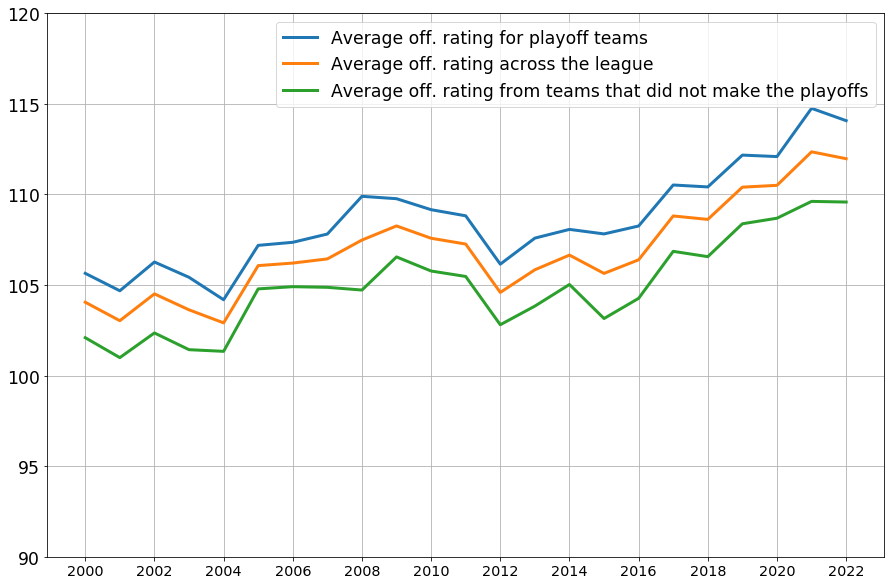

In [7]:
plt.figure(figsize=(15,10))


plt.grid()
plt.plot(SEASONS, avg_off_rtgs_playoffs, lw=3, label='Average off. rating for playoff teams')
plt.plot(SEASONS, avg_off_ratings, lw=3, label='Average off. rating across the league')
plt.plot(SEASONS, avg_off_rtgs_non_playoffs, lw=3, label='Average off. rating from teams that did not make the playoffs')
plt.xticks(SEASONS[::2])
plt.yticks(range(90, 121, 5))
plt.legend()
plt.show()

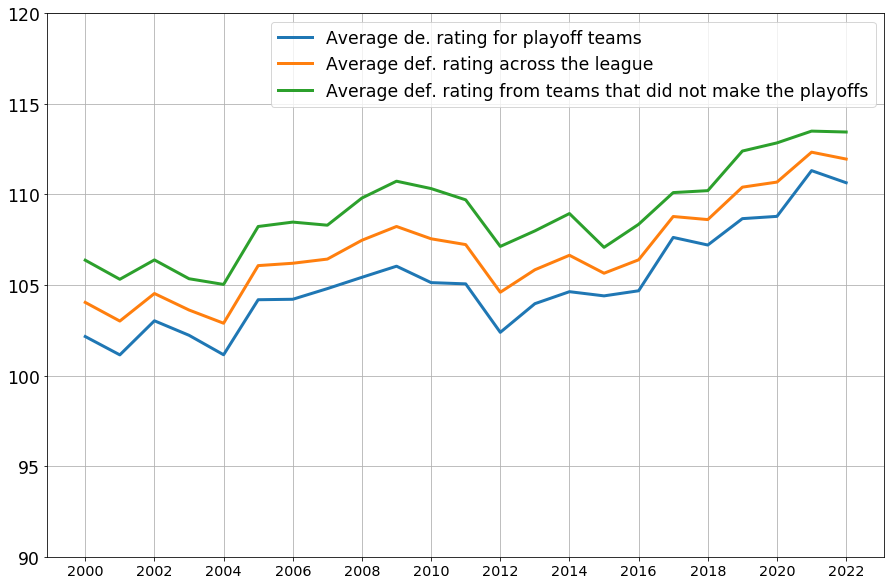

In [8]:
plt.figure(figsize=(15,10))


plt.grid()
plt.plot(SEASONS, avg_def_rtgs_playoffs, lw=3, label='Average de. rating for playoff teams')
plt.plot(SEASONS, avg_def_ratings, lw=3, label='Average def. rating across the league')
plt.plot(SEASONS, avg_def_rtgs_non_playoffs, lw=3, label='Average def. rating from teams that did not make the playoffs')
plt.xticks(SEASONS[::2])
plt.yticks(range(90, 121, 5))
plt.legend()
plt.show()

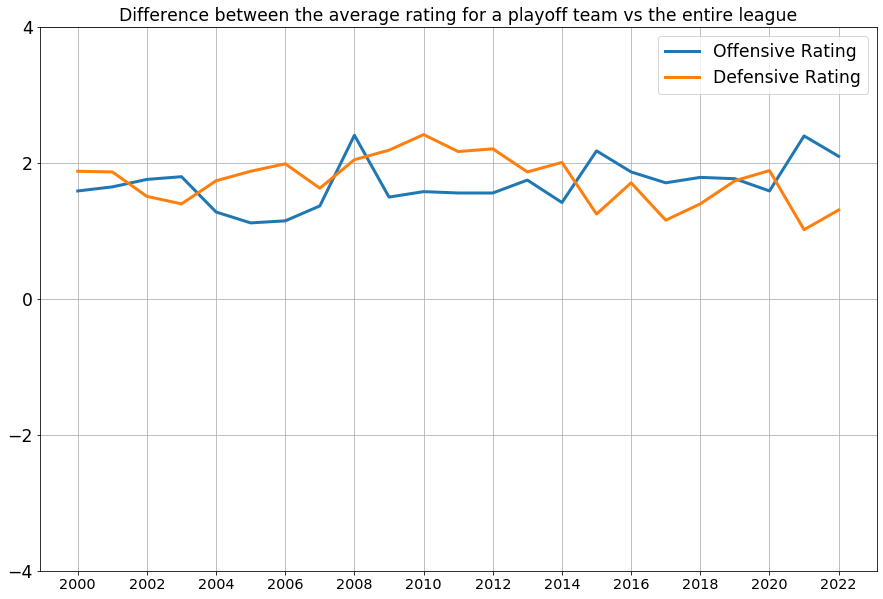

In [9]:
plt.figure(figsize=(15,10))

plt.grid()
plt.plot(SEASONS, [o for o, _ in diffs_rtg], lw=3, label='Offensive Rating')
plt.plot(SEASONS, [-d for _, d in diffs_rtg], lw=3, label='Defensive Rating')
plt.title("Difference between the average rating for a playoff team vs the entire league")
plt.xticks(SEASONS[::2])
plt.yticks(range(-4, 5, 2))
plt.legend()
plt.show()

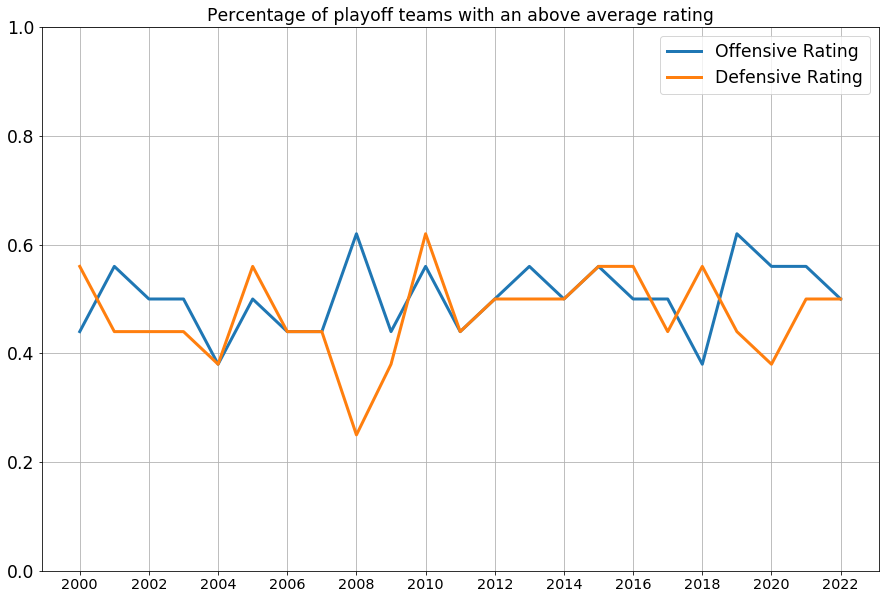

In [10]:
plt.figure(figsize=(15,10))

plt.grid()
plt.plot(SEASONS, percentage_playoff_teams_above_avg_ortg, lw=3, label='Offensive Rating')
plt.plot(SEASONS, percentage_playoff_teams_above_avg_drtg, lw=3, label='Defensive Rating')
plt.title("Percentage of playoff teams with an above average rating")
plt.xticks(SEASONS[::2])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.legend()
plt.show()